In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('../imdb.db')
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,name_basics
1,title_akas
2,title_basics
3,title_crew
4,title_episode
5,title_principals
6,title_ratings
7,title_genres


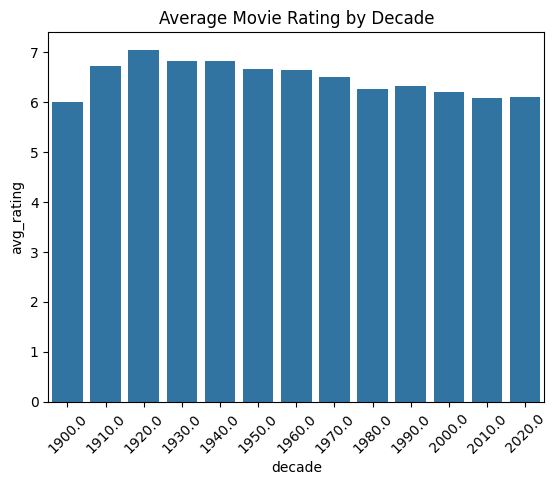

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample query: average rating by decade
query = """
SELECT ROUND(CAST(startYear / 10 AS INTEGER) * 10) AS decade,
       AVG(tr.averageRating) AS avg_rating,
       COUNT(*) AS num_movies
FROM title_ratings tr
JOIN title_basics tb ON tr.tconst = tb.tconst
WHERE tb.titleType = 'movie' AND tb.isAdult = 0 AND tr.numVotes > 1000
GROUP BY decade
ORDER BY decade
"""
df = pd.read_sql_query(query, conn)

# Plot
sns.barplot(data=df, x='decade', y='avg_rating')
plt.title('Average Movie Rating by Decade')
plt.xticks(rotation=45)
plt.show()

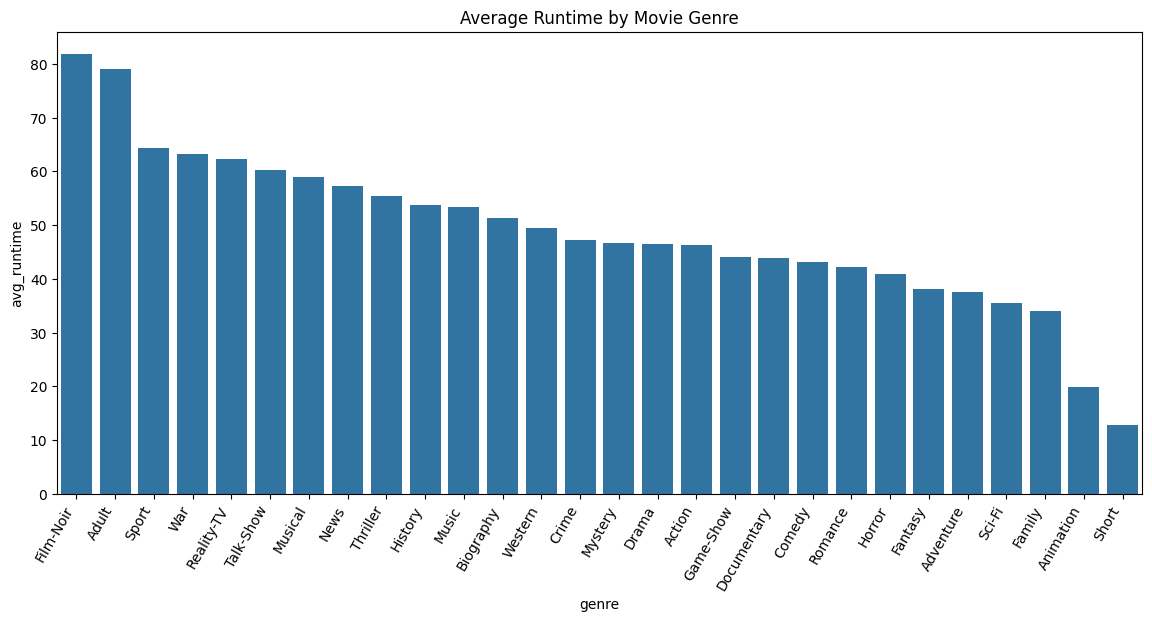

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample query: average rating by decade
query = """
SELECT tg.genre as genre, AVG(tb.runtimeMinutes) as avg_runtime
FROM title_genres tg
JOIN title_basics tb ON tg.tconst = tb.tconst
GROUP BY tg.genre
"""
df = pd.read_sql_query(query, conn)

# Plot
df = df.sort_values('avg_runtime', ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='genre', y='avg_runtime')
plt.xticks(rotation=60, ha='right')
plt.title('Average Runtime by Movie Genre')
plt.show()

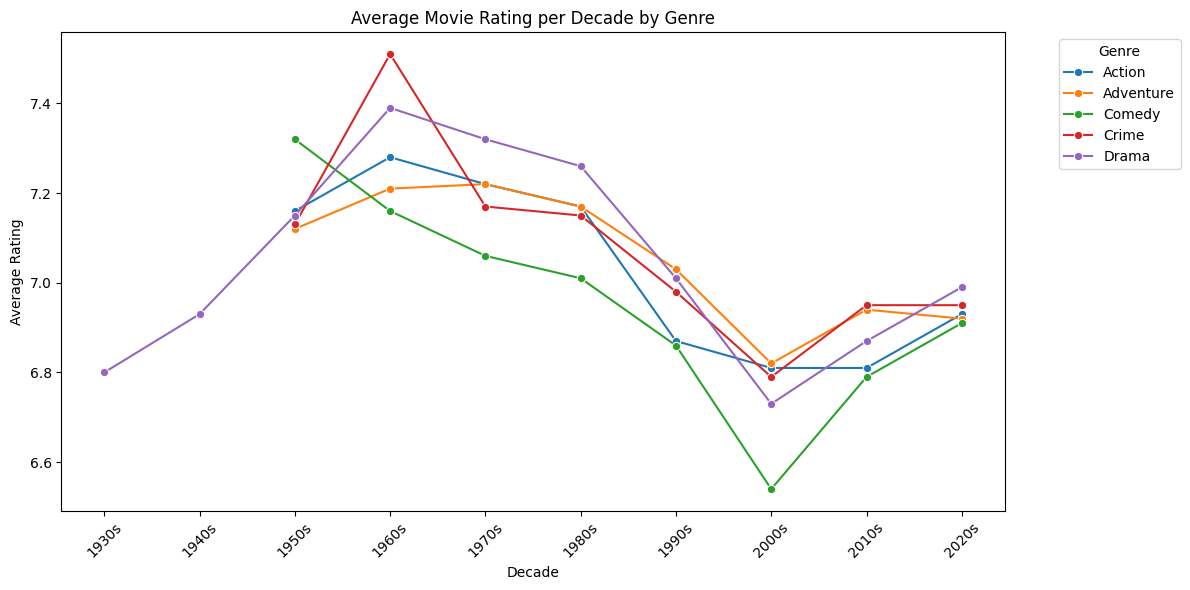

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample query: average rating by decade
query = """
SELECT tg.genre, CAST(FLOOR(endYear / 10) * 10 AS INTEGER) || 's' AS decade, ROUND(AVG(tr.averageRating), 2) AS average_rating, SUM(tr.numVotes) as total_votes
FROM title_genres tg
JOIN title_basics tb ON tg.tconst = tb.tconst
JOIN title_ratings tr ON tr.tconst = tb.tconst
WHERE tg.genre != 'None' AND decade != 'None'
GROUP BY tg.genre, decade
ORDER BY tg.genre, decade;
"""
df = pd.read_sql_query(query, conn)

# Plot
top_genres = df.groupby('genre')['total_votes'].sum().nlargest(5).index
df = df[df['genre'].isin(top_genres)]

# Sort decades to ensure proper order
decade_order = sorted(df['decade'].unique(), key=lambda x: int(x.strip('s')))
df['decade'] = pd.Categorical(df['decade'], categories=decade_order, ordered=True)

# Plot: One line per genre over decades
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='decade', y='average_rating', hue='genre', marker='o')

plt.title('Average Movie Rating per Decade by Genre')
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()